## 1. Setup do projeto

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

## 2. Carga dos dados 

In [5]:
iris_rotulado = pd.read_csv('datasets/iris.data', header=None,
                        names=['sepal_length', 'sepal_width', 'pepal_length', 'petal_width', 'specie'])

In [7]:
iris_rotulado.head()

,sepal_length,sepal_width,pepal_length,petal_width,specie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris_rotulado.shape

(150, 5)

## 3. Preparação dos dados

In [8]:
# Sempre tem que remover o rotulo antes de aplicar o KMeans
iris_nao_rotulado = iris_rotulado.iloc[:, :-1]
iris_nao_rotulado.head()

,sepal_length,sepal_width,pepal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 4. Agrupamento

In [11]:
model = KMeans(n_clusters=3)
model.fit(iris_nao_rotulado)
grupos = model.predict(iris_nao_rotulado)

In [12]:
print(grupos)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


## 5. Visualização

In [16]:
# sugestão: TSNE
xs = iris_rotulado.iloc[:, 0]
ys = iris_rotulado.iloc[:, 2]

centroids = model.cluster_centers_
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 2]

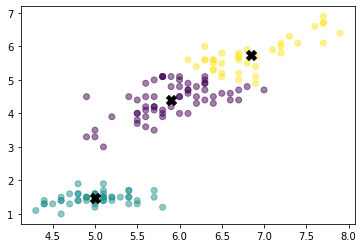

In [17]:
_=plt.scatter(xs, ys, c=grupos, alpha=.5)
_=plt.scatter(centroids_x, centroids_y, c='black', marker='X', s=100)

## 6. Avaliação

In [20]:
df = pd.DataFrame({'grupos': grupos, 'species': iris_rotulado['specie']})
ct = pd.crosstab(df['grupos'], df['species'])
print(ct)

species  Iris-setosa  Iris-versicolor  Iris-virginica
grupos                                               
0                  0               48              14
1                 50                0               0
2                  0                2              36


In [21]:
ks = range(1, 6)
inercias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(iris_nao_rotulado)
    inercias.append(model.inertia_)

([<matplotlib.axis.XTick at 0x1dc8bf2ee50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

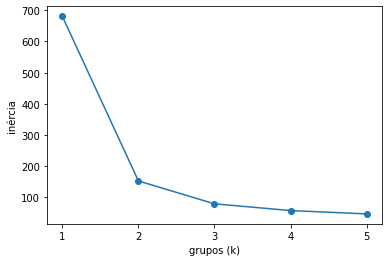

In [24]:
_=plt.plot(ks, inercias, '-o')
plt.xlabel('grupos (k)')
plt.ylabel('inércia')
plt.xticks(ks)

para casa: normalizar
fazer standart scaler, max min scaler